In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score, f1_score, auc,roc_auc_score,cohen_kappa_score,matthews_corrcoef



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
data_frame = pd.read_csv('/content/drive/MyDrive/parkinsons.data')

In [32]:
data_frame.shape

(195, 24)

In [33]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [34]:
data_frame.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [35]:
print(data_frame.isnull().values.any())

False


In [36]:
data_frame['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

<Axes: xlabel='status', ylabel='count'>

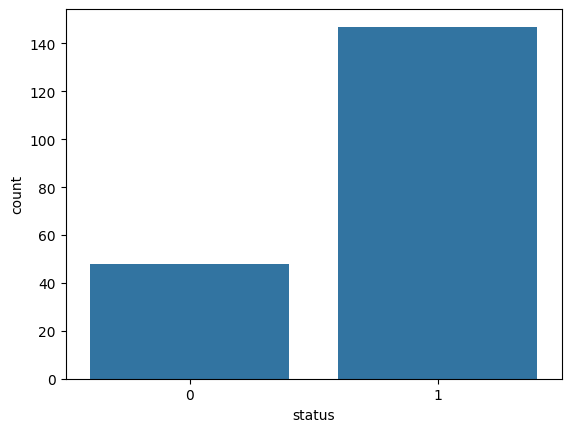

In [37]:
sns.countplot(x ='status', data = data_frame)

In [38]:
#iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/parkinsons.data')
X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=columns)

# Perform LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, y_train)

# Extract the coefficients for each feature
coefficients = lda.coef_

# Visualize the importance of each feature
feature_importance = pd.Series(coefficients.ravel(), index=columns).sort_values(ascending=False)

print("Feature Importance:")
print(feature_importance)


Feature Importance:
Shimmer:APQ3        103277.920240
MDVP:RAP             13455.296160
MDVP:PPQ               596.972052
MDVP:Shimmer           434.969167
PPE                     19.041925
spread2                 13.930614
DFA                      5.194187
MDVP:Shimmer(dB)         2.070473
D2                       1.101826
spread1                  0.872576
MDVP:Fhi(Hz)            -0.002700
MDVP:Flo(Hz)            -0.016838
MDVP:Fo(Hz)             -0.031892
HNR                     -0.171517
RPDE                   -11.235491
NHR                    -26.465545
MDVP:APQ               -28.002352
Shimmer:APQ5          -435.480452
Jitter:DDP           -2975.288508
MDVP:Jitter(%)       -3075.937051
MDVP:Jitter(Abs)    -33776.455729
Shimmer:DDA         -34515.805442
dtype: float64


In [39]:
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import numpy as np

# Assuming 'data_frame' is your DataFrame containing the data

# Step 1: Balancing using SMOTE+TOMEK
resample2 = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x = data_frame.drop(["status", "name"], axis=1)
y = data_frame["status"]
x_res2, y_res2 = resample2.fit_resample(x, y)

# Step 2: Augmentation
data = np.column_stack((x_res2, y_res2))

x_balanced = data[:, :-1]
y_balanced = data[:, -1]

num_samples_to_add = 600

additional_samples_indices = np.concatenate([
    np.random.choice(np.where(y_balanced == 0)[0], num_samples_to_add // 2, replace=True),
    np.random.choice(np.where(y_balanced == 1)[0], num_samples_to_add // 2, replace=True)
])

x_augmented = np.vstack([x_balanced, x_balanced[additional_samples_indices]])
y_augmented = np.hstack([y_balanced, y_balanced[additional_samples_indices]])

print("Number of samples after augmentation:")
print("Class 0:", np.sum(y_augmented == 0))
print("Class 1:", np.sum(y_augmented == 1))

Number of samples after augmentation:
Class 0: 442
Class 1: 447


# **bagging ensemble technique**: Bagging (Bootstrap Aggregating) is an ensemble technique that involves training multiple instances of the same base model on different subsets of the training data and then averaging the predictions.

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        98
         1.0       0.99      1.00      0.99        80

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178



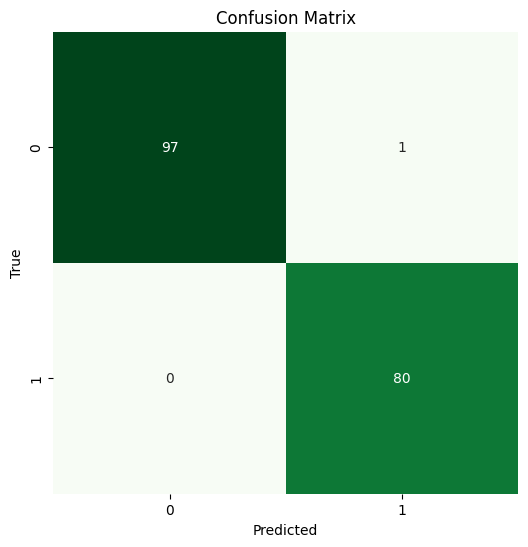

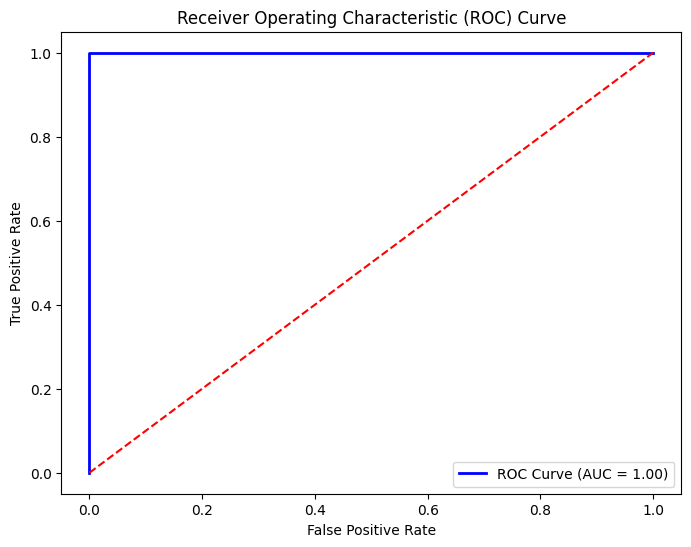

Accuracy: 0.9944 Precision: 0.9877 Recall: 1.0000 F1 Score: 0.9938 AUC Score: 0.9949 MCC: 0.9887 Kappa: 0.9887
Specificity: 0.9898


In [41]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',    'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA',  'NHR',  'HNR',  'RPDE', 'DFA',  'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_augmented, y_augmented, test_size=0.2, random_state=42)

# Create a base Decision Tree classifier
base_classifier = DecisionTreeClassifier()

# Create a Bagging classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the Bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Classification Report:\n{classification_rep}')

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC curve
y_pred_prob = bagging_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred), 'Precision: %.4f' % precision_score(y_test, y_pred), 'Recall: %.4f' % recall_score(y_test, y_pred),
      'F1 Score: %.4f' % f1_score(y_test, y_pred), 'AUC Score: %.4f' % roc_auc_score(y_test, y_pred),'MCC: %.4f' % matthews_corrcoef(y_test, y_pred), 'Kappa: %.4f' % cohen_kappa_score(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print('Specificity: %.4f' % specificity)



# boosting ensemble technique : Boosting is an ensemble technique that combines multiple weak learners to create a strong learner. Unlike bagging, boosting trains models sequentially, with each model giving more weight to instances that the previous models misclassified.

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        98
         1.0       0.99      0.99      0.99        80

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178



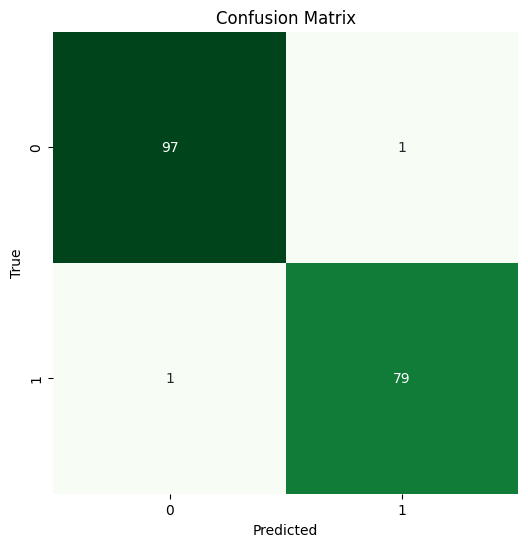

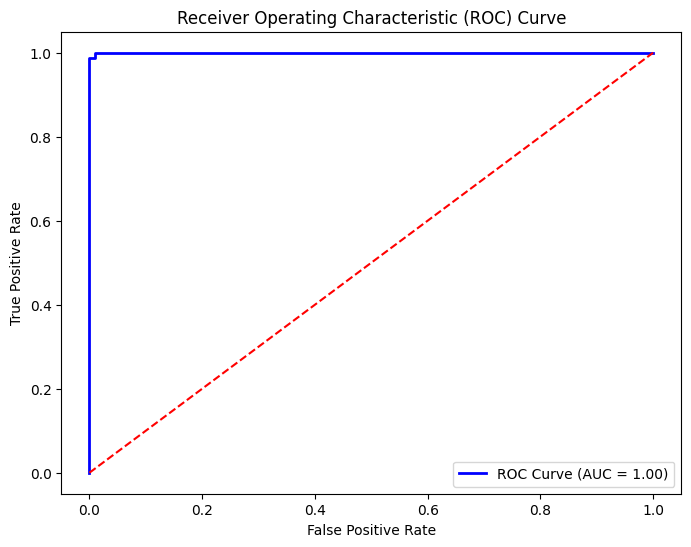

Accuracy: 0.9888 Precision: 0.9875 Recall: 0.9875 F1 Score: 0.9875 AUC Score: 0.9886 MCC: 0.9773 Kappa: 0.9773
Specificity: 0.9898


In [42]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_augmented, y_augmented, test_size=0.2, random_state=42)

# Create a base Decision Tree classifier (a weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1)  # You can adjust the hyperparameters

# Create an AdaBoost classifier using the base classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Classification Report:\n{classification_rep}')

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC curve
y_pred_prob = adaboost_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred), 'Precision: %.4f' % precision_score(y_test, y_pred), 'Recall: %.4f' % recall_score(y_test, y_pred),
      'F1 Score: %.4f' % f1_score(y_test, y_pred), 'AUC Score: %.4f' % roc_auc_score(y_test, y_pred),'MCC: %.4f' % matthews_corrcoef(y_test, y_pred), 'Kappa: %.4f' % cohen_kappa_score(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print('Specificity: %.4f' % specificity)

# Stacking is an ensemble learning technique that combines the predictions of multiple models by training a meta-model on top of their outputs.

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        98
         1.0       0.99      1.00      0.99        80

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178



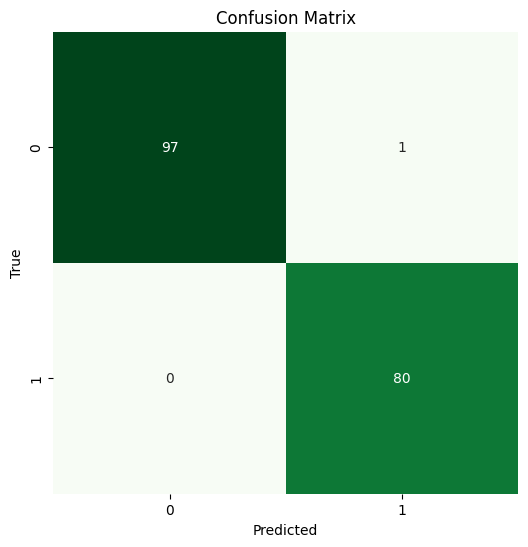

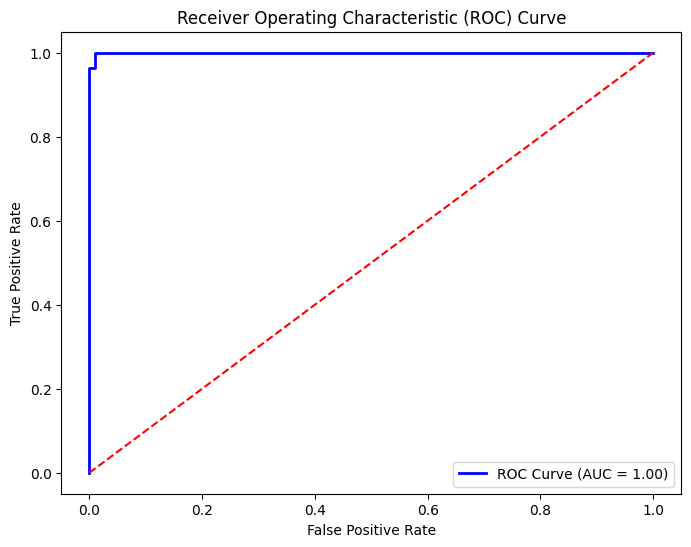

Accuracy: 0.9944 Precision: 0.9877 Recall: 1.0000 F1 Score: 0.9938 AUC Score: 0.9949 MCC: 0.9887 Kappa: 0.9887
Specificity: 0.9898


In [43]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_augmented, y_augmented, test_size=0.2, random_state=42)

# Define base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42))
]

# Define the meta-classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Train the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Classification Report:\n{classification_rep}')

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC curve
y_pred_prob = stacking_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred), 'Precision: %.4f' % precision_score(y_test, y_pred), 'Recall: %.4f' % recall_score(y_test, y_pred),
      'F1 Score: %.4f' % f1_score(y_test, y_pred), 'AUC Score: %.4f' % roc_auc_score(y_test, y_pred),'MCC: %.4f' % matthews_corrcoef(y_test, y_pred), 'Kappa: %.4f' % cohen_kappa_score(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print('Specificity: %.4f' % specificity)

**SVM**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.8717948717948718
Confusion Matrix:
[[ 4  3]
 [ 2 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



KNN

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9230769230769231
Confusion Matrix:
[[ 6  1]
 [ 2 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.97      0.94      0.95        32

    accuracy                           0.92        39
   macro avg       0.86      0.90      0.88        39
weighted avg       0.93      0.92      0.93        39



**RF**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



**DT**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9230769230769231
Confusion Matrix:
[[ 5  2]
 [ 1 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



**NB**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values (optional for Naive Bayes, but can be beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Train the classifier on the training data
gnb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.717948717948718
Confusion Matrix:
[[ 4  3]
 [ 8 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.89      0.75      0.81        32

    accuracy                           0.72        39
   macro avg       0.61      0.66      0.62        39
weighted avg       0.79      0.72      0.74        39



**LR**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# For binary classification, let's use only two classes (0 and 1)
X = X[y != 2]
y = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Train the classifier on the training data
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.8974358974358975
Confusion Matrix:
[[ 3  4]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



**Extra** Trees

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an Extra Trees classifier
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
et_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = et_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



**AdaBoost**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base Decision Tree classifier (a weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1)  # You can adjust the hyperparameters

# Create an AdaBoost classifier using the base classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.8717948717948718
Confusion Matrix:
[[ 4  3]
 [ 2 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



**Gradiant Boosting**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9230769230769231
Confusion Matrix:
[[ 5  2]
 [ 1 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



**XGBoost** (Extreme Gradient Boosting)

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DMatrix for efficient handling of data in XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'multi:softmax',  # for multiclass classification
    'num_class': 3,  # number of classes in the target variable
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'merror'
}

# Train the XGBoost model
num_round = 100
xgb_model = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = xgb_model.predict(dtest)

# Convert predicted labels to integers
y_pred = y_pred.astype(int)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9487179487179487
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



##Voting

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


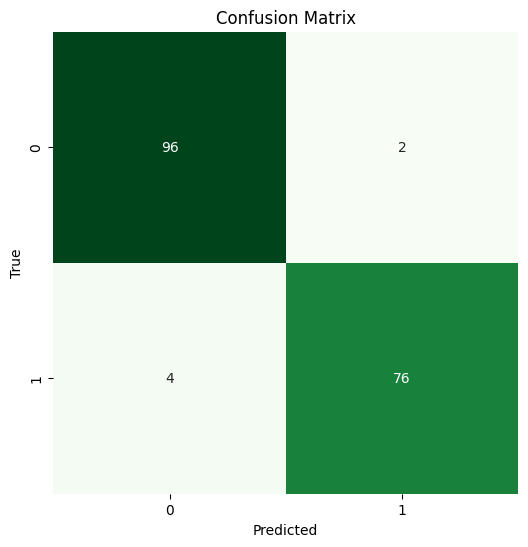

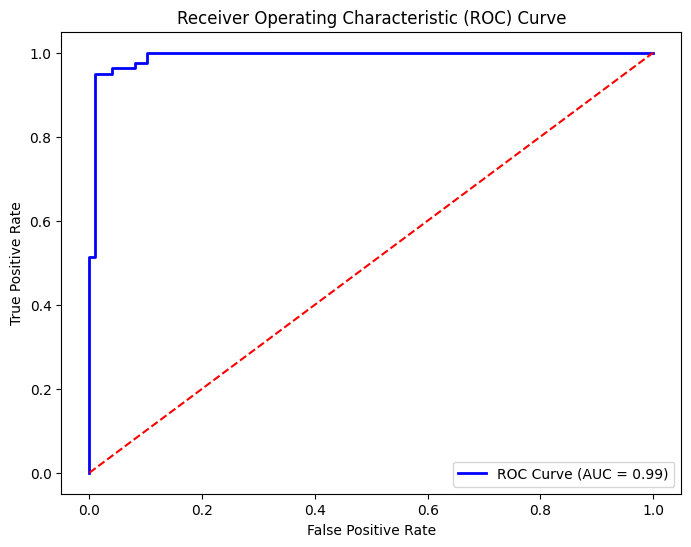

Accuracy: 0.9663 Precision: 0.9744 Recall: 0.9500 F1 Score: 0.9620 AUC Score: 0.9648 MCC: 0.9320 Kappa: 0.9317
Specificity: 0.9796


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x_augmented, y_augmented, test_size=0.2, random_state=42)

# Define the base classifiers
log_reg_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier(max_depth=5)
svm_clf = SVC(kernel='linear', probability=True)

# Create a Voting Classifier using the base classifiers
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg_clf), ('dt', decision_tree_clf), ('svm', svm_clf)],
    voting='soft'  # Use 'soft' voting to get class probabilities
)

# Train the Voting Classifier on the training data with selected features
voting_clf.fit(X_train, y_train)

# Make predictions on the test set with selected features
y_pred = voting_clf.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC curve
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred), 'Precision: %.4f' % precision_score(y_test, y_pred), 'Recall: %.4f' % recall_score(y_test, y_pred),
      'F1 Score: %.4f' % f1_score(y_test, y_pred), 'AUC Score: %.4f' % roc_auc_score(y_test, y_pred),'MCC: %.4f' % matthews_corrcoef(y_test, y_pred), 'Kappa: %.4f' % cohen_kappa_score(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print('Specificity: %.4f' % specificity)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


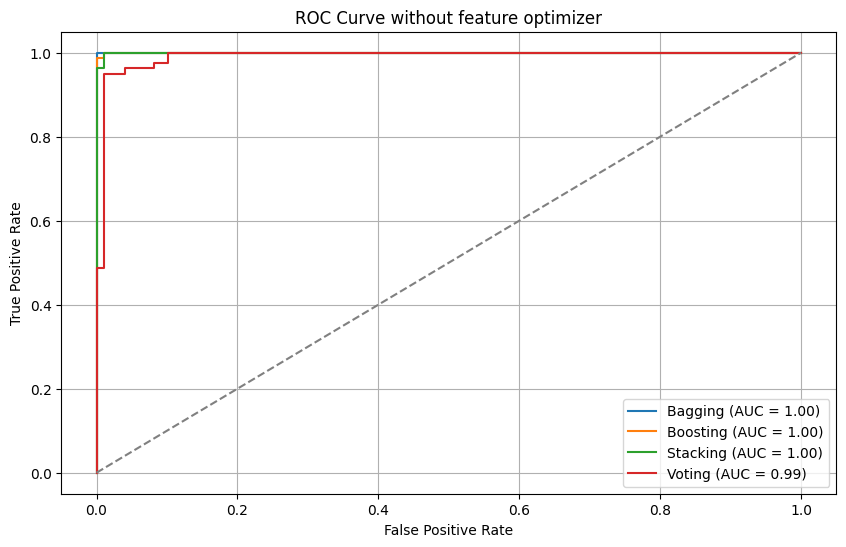

In [46]:
from sklearn.metrics import roc_curve, auc
# Initialize classifiers
classifiers = {
    "Bagging": bagging_classifier,
    "Boosting": adaboost_classifier,
    "Stacking": stacking_classifier,
    "Voting": voting_clf
}

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 6))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve without feature optimizer')
plt.legend()
plt.grid(True)
plt.show()